<a href="https://colab.research.google.com/github/farihahahmed/wind-power-forecasting-AI-cost-cutting-with-past-power-production-data/blob/main/WB_Applying_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting it up

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Our Data
import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/HSA/WB_input.csv')
y = pd.read_csv('/content/drive/MyDrive/HSA/WB_output.csv')

In [ ]:
x

,Unnamed: 0,Wind Speed (m/s),Wind Direction (°)
0,0,5.311336,259.994904
1,1,5.672167,268.641113
2,2,5.216037,272.564789
3,3,5.659674,271.258087
4,4,5.577941,265.674286
...,...,...,...
50525,50525,11.404030,80.502724
50526,50526,7.332648,84.062599
50527,50527,8.435358,84.742500
50528,50528,9.421366,84.297913


In [ ]:
y

,Unnamed: 0,LV ActivePower (kW)
0,0,380.047791
1,1,453.769196
2,2,306.376587
3,3,419.645905
4,4,380.650696
...,...,...
50525,50525,2963.980957
50526,50526,1684.353027
50527,50527,2201.106934
50528,50528,2515.694092


In [ ]:
x = x.drop(["Unnamed: 0"], axis=1)
y = y.drop(["Unnamed: 0"], axis=1)

In [ ]:
print(x.shape)
print(y.shape)

(50530, 2)
(50530, 1)


In [ ]:
x

,Wind Speed (m/s),Wind Direction (°)
0,5.311336,259.994904
1,5.672167,268.641113
2,5.216037,272.564789
3,5.659674,271.258087
4,5.577941,265.674286
...,...,...
50525,11.404030,80.502724
50526,7.332648,84.062599
50527,8.435358,84.742500
50528,9.421366,84.297913


In [ ]:
y

,LV ActivePower (kW)
0,380.047791
1,453.769196
2,306.376587
3,419.645905
4,380.650696
...,...
50525,2963.980957
50526,1684.353027
50527,2201.106934
50528,2515.694092


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, shuffle = False)

#LR model

In [ ]:
pip install sigfig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sigfig import round

In [ ]:
from sklearn.linear_model import LinearRegression

#model
lr = LinearRegression()

# fit
lr.fit(x_train, y_train)

# predict
pred = lr.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

R2: 0.8304
RMSE: 552.7
MAE: 413.1


#KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#model
knn = KNeighborsRegressor(n_neighbors=7)

# fit
knn.fit(x_train,y_train)

# predict
pred = knn.predict(x_test)


# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

R2: 0.8257
RMSE: 560.3
MAE: 270.5


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# model
dt = DecisionTreeRegressor(max_depth=10,random_state=27)

# fit
dt.fit(x_train, y_train)

# predict
pred = dt.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

R2: 0.783
RMSE: 625.1
MAE: 272.7


#MLP Reggresor

In [ ]:
from sklearn.neural_network import MLPRegressor

#model
mlp = MLPRegressor(random_state=1, max_iter=30)

# fit
mlp.fit(x_train,y_train)

# predict
pred = mlp.predict(x_test)



# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.799
RMSE: 601.6
MAE: 470.9


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#model
rf = RandomForestRegressor(n_estimators=20, random_state=1)

# fit
rf.fit(x_train,y_train)

# predict
pred = rf.predict(x_test)


# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

<ipython-input-44-7c4b72723ec1>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


R2: 0.8243
RMSE: 562.6
MAE: 268.6


#NN #1
- 3 dense layers
- 96 to 500 to 8 to 48
- 10 epochs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import Input

In [ ]:
# define the keras model
model1 = Sequential()
model1.add(Dense(500, input_dim=2, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1264/1264 [==============================] - 4s 2ms/step - loss: 1056538.7500
Epoch 2/10
1264/1264 [==============================] - 4s 3ms/step - loss: 315978.8750
Epoch 3/10
1264/1264 [==============================] - 3s 2ms/step - loss: 265330.2812
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 257924.1562
Epoch 5/10
1264/1264 [==============================] - 2s 2ms/step - loss: 256292.7500
Epoch 6/10
1264/1264 [==============================] - 3s 2ms/step - loss: 256344.1250
Epoch 7/10
1264/1264 [==============================] - 4s 3ms/step - loss: 256180.1094
Epoch 8/10
1264/1264 [==============================] - 3s 2ms/step - loss: 255348.5312
Epoch 9/10
1264/1264 [==============================] - 3s 2ms/step - loss: 253845.0469
Epoch 10/10
1264/1264 [==============================] - 3s 2ms/step - loss: 252601.4844


In [ ]:
#predict
pred = model1.predict(x_test)



# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 1ms/step
R2: 0.8481
RMSE: 523.0
MAE: 344.7


In [ ]:
pred24 = pred[0:144]
actual24 = y_test[0:144]

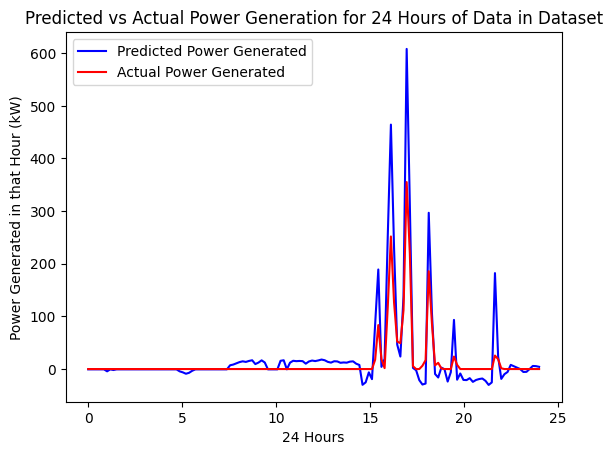

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
x_axis = np.linspace(0, 24, num=144)

# Plotting both the curves simultaneously
plt.plot(x_axis, pred24, color='b', label='Predicted Power Generated')
plt.plot(x_axis, actual24, color='r', label='Actual Power Generated')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("24 Hours")
plt.ylabel("Power Generated in that Hour (kW)")
plt.title("Predicted vs Actual Power Generation for 24 Hours of Data in Dataset")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

#NN2
- 3 dense layers
- 96 to 1000 to 8 to 48
- 10 epochs

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(1000, input_dim=2, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1264/1264 [==============================] - 5s 3ms/step - loss: 921670.5000
Epoch 2/10
1264/1264 [==============================] - 3s 3ms/step - loss: 297785.4375
Epoch 3/10
1264/1264 [==============================] - 3s 2ms/step - loss: 260935.0312
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 258046.9062
Epoch 5/10
1264/1264 [==============================] - 3s 2ms/step - loss: 256471.2656
Epoch 6/10
1264/1264 [==============================] - 4s 3ms/step - loss: 254092.9688
Epoch 7/10
1264/1264 [==============================] - 3s 2ms/step - loss: 251765.6406
Epoch 8/10
1264/1264 [==============================] - 3s 2ms/step - loss: 248791.9219
Epoch 9/10
1264/1264 [==============================] - 3s 2ms/step - loss: 243800.6875
Epoch 10/10
1264/1264 [==============================] - 3s 3ms/step - loss: 239821.2344


In [ ]:
#predict
pred = model2.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: 0.8396
RMSE: 537.4
MAE: 350.2


#NN3
- 3 dense layers
- 96 to 1000 to 8 to 48
- 15 epochs

In [ ]:
# define the keras model
model3 = Sequential()
model3.add(Dense(1000, input_dim=2, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1))
model3.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model3.fit(x_train, y_train, epochs=15)

Epoch 1/15
1264/1264 [==============================] - 5s 3ms/step - loss: 914787.0625
Epoch 2/15
1264/1264 [==============================] - 4s 3ms/step - loss: 290247.3438
Epoch 3/15
1264/1264 [==============================] - 3s 2ms/step - loss: 261322.0625
Epoch 4/15
1264/1264 [==============================] - 3s 2ms/step - loss: 256821.4062
Epoch 5/15
1264/1264 [==============================] - 4s 3ms/step - loss: 252139.6875
Epoch 6/15
1264/1264 [==============================] - 4s 3ms/step - loss: 243440.5469
Epoch 7/15
1264/1264 [==============================] - 3s 2ms/step - loss: 235393.8750
Epoch 8/15
1264/1264 [==============================] - 3s 2ms/step - loss: 230182.0156
Epoch 9/15
1264/1264 [==============================] - 3s 2ms/step - loss: 220647.3750
Epoch 10/15
1264/1264 [==============================] - 4s 3ms/step - loss: 212118.1875
Epoch 11/15
1264/1264 [==============================] - 5s 4ms/step - loss: 202826.6406
Epoch 12/15
1264/1264 [=======

In [ ]:
#predict
pred = model3.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 1ms/step
R2: 0.8828
RMSE: 459.5
MAE: 295.2


#NN #4
- 2 dense layers
- 96 to 100 to 48
- 10 epochs

In [ ]:
model4 = Sequential()
model4.add(Dense(100, activation='relu', input_dim=2))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')
model4.fit(x_train, y_train, epochs=10)

Epoch 1/10
1264/1264 [==============================] - 3s 2ms/step - loss: 2074269.1250
Epoch 2/10
1264/1264 [==============================] - 2s 2ms/step - loss: 678381.8750
Epoch 3/10
1264/1264 [==============================] - 3s 3ms/step - loss: 405955.4062
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 379551.7812
Epoch 5/10
1264/1264 [==============================] - 2s 2ms/step - loss: 355466.7188
Epoch 6/10
1264/1264 [==============================] - 2s 2ms/step - loss: 329069.4062
Epoch 7/10
1264/1264 [==============================] - 2s 2ms/step - loss: 305991.2188
Epoch 8/10
1264/1264 [==============================] - 3s 2ms/step - loss: 287514.4062
Epoch 9/10
1264/1264 [==============================] - 3s 3ms/step - loss: 276395.9375
Epoch 10/10
1264/1264 [==============================] - 2s 2ms/step - loss: 270438.4375


In [ ]:
#predict
pred = model4.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 0s 1ms/step
R2: 0.8326
RMSE: 549.0
MAE: 404.9


#NN #5
- 3 dense layers
- 96 to 1000 to 8 to 48
- 20 epochs

In [ ]:
# define the keras model
model5 = Sequential()
model5.add(Dense(1000, input_dim=2, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1))
model5.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model5.fit(x_train, y_train, epochs=20)

Epoch 1/20
1264/1264 [==============================] - 4s 2ms/step - loss: 1159753.3750
Epoch 2/20
1264/1264 [==============================] - 4s 3ms/step - loss: 333467.5312
Epoch 3/20
1264/1264 [==============================] - 3s 3ms/step - loss: 266202.4062
Epoch 4/20
1264/1264 [==============================] - 3s 2ms/step - loss: 258716.1719
Epoch 5/20
1264/1264 [==============================] - 3s 2ms/step - loss: 256228.4375
Epoch 6/20
1264/1264 [==============================] - 4s 3ms/step - loss: 256833.2969
Epoch 7/20
1264/1264 [==============================] - 4s 3ms/step - loss: 257465.4062
Epoch 8/20
1264/1264 [==============================] - 3s 2ms/step - loss: 257486.4531
Epoch 9/20
1264/1264 [==============================] - 3s 2ms/step - loss: 257154.3281
Epoch 10/20
1264/1264 [==============================] - 3s 2ms/step - loss: 255619.1719
Epoch 11/20
1264/1264 [==============================] - 4s 3ms/step - loss: 252877.4688
Epoch 12/20
1264/1264 [======

In [ ]:
#predict
pred = model5.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: 0.8743
RMSE: 475.8
MAE: 294.1


#NN #6
- 3 dense layers
- 96 to 100 to 100 to 48
- 30 epochs

In [ ]:
model6 = Sequential()
model6.add(Input(shape=(2,)))
model6.add(Dense(100, activation = 'relu'))
model6.add(Dense(100, activation = 'relu'))
model6.add(Dense(1, activation = 'relu'))
model6.compile(loss='mse', optimizer='adam')
model6.fit(x_train, y_train, epochs=30)

Epoch 1/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303194.7500
Epoch 2/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303196.0000
Epoch 3/30
1264/1264 [==============================] - 4s 3ms/step - loss: 3303195.7500
Epoch 4/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303194.7500
Epoch 5/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303196.0000
Epoch 6/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303196.2500
Epoch 7/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303195.5000
Epoch 8/30
1264/1264 [==============================] - 4s 3ms/step - loss: 3303190.7500
Epoch 9/30
1264/1264 [==============================] - 2s 2ms/step - loss: 3303196.0000
Epoch 10/30
1264/1264 [==============================] - 2s 2ms/step - loss: 3303194.5000
Epoch 11/30
1264/1264 [==============================] - 3s 2ms/step - loss: 3303193.2500
Epoch 12/30
1264/12

In [ ]:
#predict
pred = model6.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: -1.193
RMSE: 1987.0
MAE: 1466.0


#NN #7
- 3 dense layers
- 96 to 1000 to 8 to 48
- 30 epochs

In [ ]:
# define the keras model
model7 = Sequential()
model7.add(Dense(1000, input_dim=2, activation='relu'))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(1))
model7.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model7.fit(x_train, y_train, epochs=30)

Epoch 1/30
1264/1264 [==============================] - 4s 2ms/step - loss: 798302.1875
Epoch 2/30
1264/1264 [==============================] - 5s 4ms/step - loss: 281557.8438
Epoch 3/30
1264/1264 [==============================] - 8s 6ms/step - loss: 258417.8125
Epoch 4/30
1264/1264 [==============================] - 5s 4ms/step - loss: 254496.8594
Epoch 5/30
1264/1264 [==============================] - 5s 4ms/step - loss: 249475.2500
Epoch 6/30
1264/1264 [==============================] - 8s 6ms/step - loss: 242048.7031
Epoch 7/30
1264/1264 [==============================] - 5s 4ms/step - loss: 235761.8438
Epoch 8/30
1264/1264 [==============================] - 5s 4ms/step - loss: 226358.1094
Epoch 9/30
1264/1264 [==============================] - 7s 6ms/step - loss: 220695.1094
Epoch 10/30
1264/1264 [==============================] - 3s 2ms/step - loss: 212600.1406
Epoch 11/30
1264/1264 [==============================] - 2s 2ms/step - loss: 204473.6719
Epoch 12/30
1264/1264 [=======

In [ ]:
#predict
pred = model7.predict(x_test)

# R2 score
print("R2:", round(r2_score(y_test, pred), sigfigs=4))

#RMSE
print("RMSE:",  round(sqrt(mean_squared_error(y_test, pred)), sigfigs=4))

#MAE
print("MAE:", round(mean_absolute_error(y_test, pred), sigfigs=4))

316/316 [==============================] - 1s 2ms/step
R2: 0.9095
RMSE: 403.8
MAE: 221.2


In [ ]:
pred = pred.flatten()

# Create the DataFrame 'test_df_2'
wb_nn7 = pd.DataFrame({'pred': pred, 'y_test': y_test['LV ActivePower (kW)']})

# Print the DataFrame
wb_nn7.head()

,pred,y_test
40424,1.654101,0.0
40425,1.654101,0.0
40426,1.654101,0.0
40427,1.654101,0.0
40428,1.654101,0.0


In [ ]:
from google.colab import files
wb_nn7.to_csv('wb_nn7.csv')
files.download('wb_nn7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>